In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
from thinning import sample_hawkes_process_thinning, sample_hawkes_process_thinning_vectorised, sample_hawkes_process_thinning_true_vectorised
from utils import exp_kernel, constant_background, plot_counting_process, exp_kernel_vectorised, conditional_intensity, conditional_intensity_vectorised, conditional_intensity_true_vectorised
from time_rescaling import rescale_times, rescale_times_true_vectorised
from clustering import simulate_homogeneous_poisson_process, simulate_inhomogeneous_poisson_process, simulate_immigrants, simulate_offspring, produce_cluster, sample_hawkes_process_clustering, cluster_plot

In [3]:
from mle import log_likelihood, old_log_likelihood

In [4]:
max_T = 1000

In [5]:
hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised)

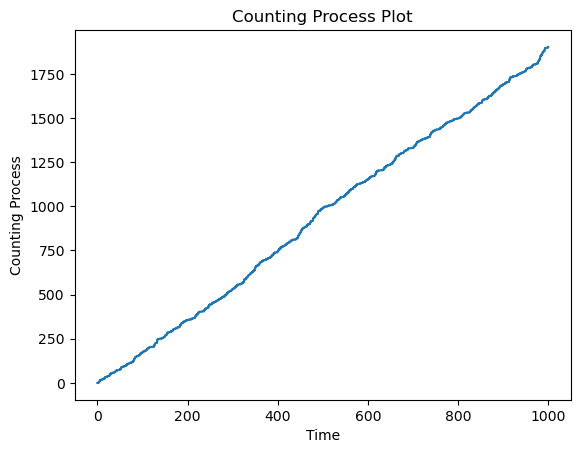

In [6]:
plot_counting_process(hawkes_realisation)

In [7]:
params = [1, 1, 2]
data = hawkes_realisation, max_T

In [8]:
# Simple grid search

In [9]:
values = np.arange(0.1,2.1,0.1)

In [11]:
best_log_likelihood = -100000

for mu in values:
    print('Current mu: ', mu)
    for alpha in values:
        for delta in values:

            params = (mu, alpha, delta)

            ll = log_likelihood(params, data)

            if ll > best_log_likelihood:
                best_log_likelihood = ll
                best_params = params
                print(f"New best ll of {best_log_likelihood} for params {params}")

Current mu:  0.1
New best ll of -657.0051523800676 for params (0.1, 0.1, 0.1)
New best ll of -625.3618519278546 for params (0.1, 0.2, 0.2)
New best ll of -604.2789638173283 for params (0.1, 0.30000000000000004, 0.30000000000000004)
New best ll of -591.8976941066435 for params (0.1, 0.4, 0.4)
New best ll of -586.0090909944613 for params (0.1, 0.5, 0.5)
New best ll of -584.9123347715056 for params (0.1, 0.6, 0.6)
Current mu:  0.2
New best ll of -573.3808556844999 for params (0.2, 0.4, 0.5)
New best ll of -562.5162410329365 for params (0.2, 0.5, 0.6)
New best ll of -557.9478606757104 for params (0.2, 0.6, 0.7000000000000001)
New best ll of -557.294887856048 for params (0.2, 0.7000000000000001, 0.8)
Current mu:  0.30000000000000004
New best ll of -555.733285052431 for params (0.30000000000000004, 0.4, 0.5)
New best ll of -545.9772610730238 for params (0.30000000000000004, 0.5, 0.6)
New best ll of -541.1343905401702 for params (0.30000000000000004, 0.6, 0.7000000000000001)
New best ll of -5

In [13]:
print(best_log_likelihood)
print(best_params)

# Output of above (took 10 mins)
# -458.5459852407587
# (0.9, 1.0, 2.0)

-458.5459852407587
(0.9, 1.0, 2.0)


Checking values of delta above 2 for completeness.

In [17]:
mu = 0.9
for alpha in values:
    print(alpha)
    for delta in (values+1):
        params = (mu, alpha, delta)

        ll = log_likelihood(params, data)

        if ll > best_log_likelihood:
            best_log_likelihood = ll
            best_params = params
            print(f"New best ll of {best_log_likelihood} for params {params}")

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0
1.1
New best ll of -457.85565948659587 for params (0.9, 1.1, 2.1)
1.2000000000000002
1.3000000000000003
1.4000000000000001
1.5000000000000002
1.6
1.7000000000000002
1.8000000000000003
1.9000000000000001
2.0


In [18]:
# Output of above
# New best ll of -457.85565948659587 for params (0.9, 1.1, 2.1)

In [24]:
from scipy.optimize import minimize

# Initial guess for the parameters
initial_guess = [1, 0.5, 1]

# Define bounds if necessary
bounds = [(0.1, None), (0.1, None), (0.1, None)]  # Example bounds, adjust as needed

# Use the minimize function to find the maximum
result = minimize(lambda params: -log_likelihood(params, data=data), initial_guess, bounds=bounds)

# The optimized parameters are in result.x
optimized_parameters = result.x

print("Optimized Parameters:", optimized_parameters)
print("Maximum Value:", -result.fun)  # Negate the value if your function was negated for maximization


Optimized Parameters: [0.97121027 1.10958637 2.26542219]
Maximum Value: -456.99360446869423


In [25]:
result

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 456.99360446869423
        x: [ 9.712e-01  1.110e+00  2.265e+00]
      nit: 11
      jac: [ 6.821e-04  6.139e-04 -2.501e-04]
     nfev: 52
     njev: 13
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [27]:
# Initial guess for the parameters
initial_guess = [5, 4, 3]

# Define bounds if necessary
bounds = [(0.1, None), (0.1, None), (0.1, None)]  # Example bounds, adjust as needed

# Use the minimize function to find the maximum
result = minimize(lambda params: -log_likelihood(params, data=data), initial_guess, bounds=bounds)

# The optimized parameters are in result.x
optimized_parameters = result.x

print("Optimized Parameters:", optimized_parameters)
print("Maximum Value:", -result.fun)  # Negate the value if your function was negated for maximization


Optimized Parameters: [0.97120987 1.10958546 2.26542286]
Maximum Value: -456.9936044682686
